# e.g. 15: Compare monthly iso20 climatology from monthly inputs (daily would be too slow with current iso20 function) from 1 assimilation run. Also monthly SST  (from monthly) and monthly taux (from daily I think).

# Similar to e.g. 14 which focused on a control run.

# last edited 5 Septmeber 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
print('BEGIN')

import socket
import re
import os
import glob

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

%matplotlib inline

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import sys
import inspect
#from decadal_diag import n_data_funcs  
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
import netCDF4

from n_data_funcs import n_data_funcs

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  plot_xy, \
  box_indices, \
  plot_box_indices, \
  smooth, \
  plot_2d_scatter, \
  lagcorr

model='CAFE'

pval=2

cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

print('END')

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


BEGIN
input_daily_files= ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020101-20020131.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020201-20020228.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020301-20020331.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020401-20020430.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020501-20020531.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r

len(boxes)= 7
boxes= ('tauuP,Nm^-2,-5,5,120,280', 'tauuwP,Nm^-2,-5,5,120,205', 'tauueP,Nm^-2,-5,5,205,280', 'tauuI,Nm^-2,-5,5,40,100', 'tauuwI,Nm^-2,-5,5,40,70', 'tauueI,Nm^-2,-5,5,70,100', 'tauuTBV,Nm^-2,-5,5,140,190')
 latmin,latmax= [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0] [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]  self.jmin,self.jmax= [42, 42, 42, 42, 42, 42, 42] [47, 47, 47, 47, 47, 47, 47]  lonmin,lonmax= [120.0, 120.0, 205.0, 40.0, 40.0, 70.0, 140.0] [280.0, 205.0, 280.0, 100.0, 70.0, 100.0, 190.0]  self.imin,self.imax= [47, 47, 81, 15, 15, 27, 55] [111, 81, 111, 39, 27, 39, 75]  actual: latmin,latmax= [-5.056179775280899 -5.056179775280899 -5.056179775280899
 -5.056179775280899 -5.056179775280899 -5.056179775280899
 -5.056179775280899] [5.056179775280899 5.056179775280899 5.056179775280899 5.056179775280899
 5.056179775280899 5.056179775280899 5.056179775280899]  actual: lonmin,lonmax= [118.75 118.75 203.75 38.75 38.75 68.75 138.75] [278.75 203.75 278.75 98.75 68.75 98.75 188.75]
c

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


color= red
lons= [120.0, 280.0, 280.0, 120.0, 120.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= blue
lons= [120.0, 205.0, 205.0, 120.0, 120.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= green
lons= [205.0, 280.0, 280.0, 205.0, 205.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= red
lons= [40.0, 100.0, 100.0, 40.0, 40.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= blue
lons= [40.0, 70.0, 70.0, 40.0, 40.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= green
lons= [70.0, 100.0, 100.0, 70.0, 70.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= brown
lons= [140.0, 190.0, 190.0, 140.0, 140.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]


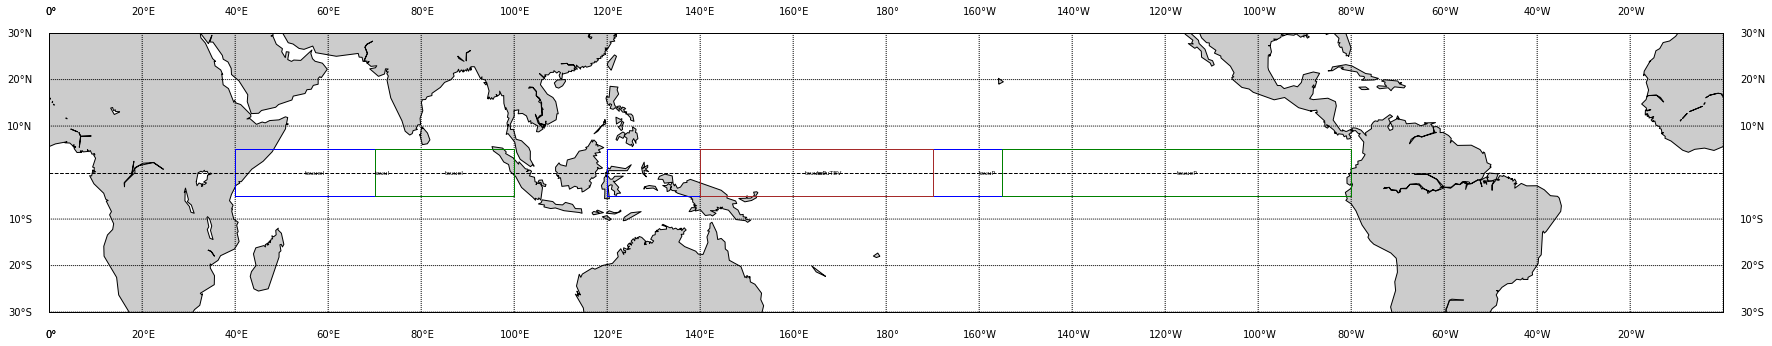

input_tauullbox_files= ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020101-20020131.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020201-20020228.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020301-20020331.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020401-20020430.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_20020501-20020531.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025/tauu_day_historical_CAFE-1-0_r1i

len(boxes)= 1
boxes= ('tauuP,Nm^-2,-5,5,120,280',)
 latmin,latmax= [-5.0] [5.0]  self.jmin,self.jmax= [42] [47]  lonmin,lonmax= [120.0] [280.0]  self.imin,self.imax= [47] [111]  actual: latmin,latmax= [-5.056179775280899] [5.056179775280899]  actual: lonmin,lonmax= [118.75] [278.75]
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.
cafe_tauu_daily.shape= (5113, 6, 65)
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
cafe_tauullbox_monthly_from_daily.shape= (168, 6, 65)
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_tauullbox_monthly_climatology_from_daily.shape= (12, 6, 65)
cafe_tauullbox_monthly_anomaly_from_daily.shape= (168, 6, 65)
color= red
lons= [120.0, 280.0, 280.0, 120.0, 120.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]


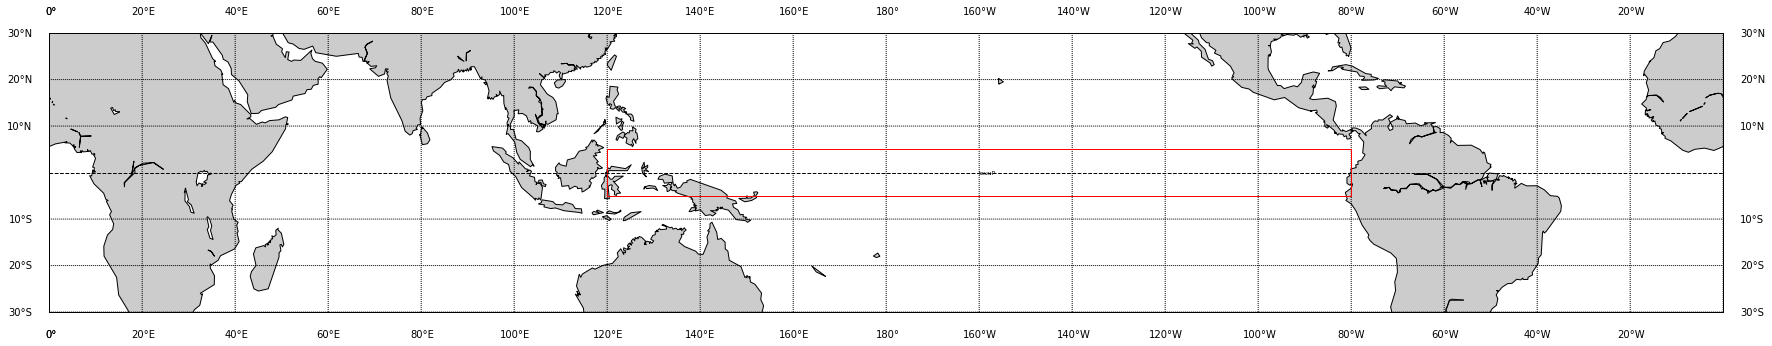

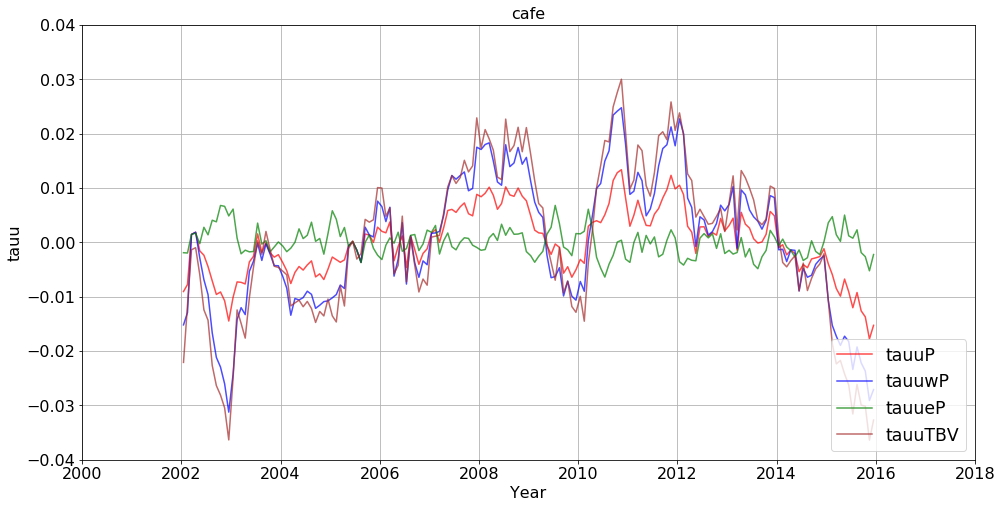

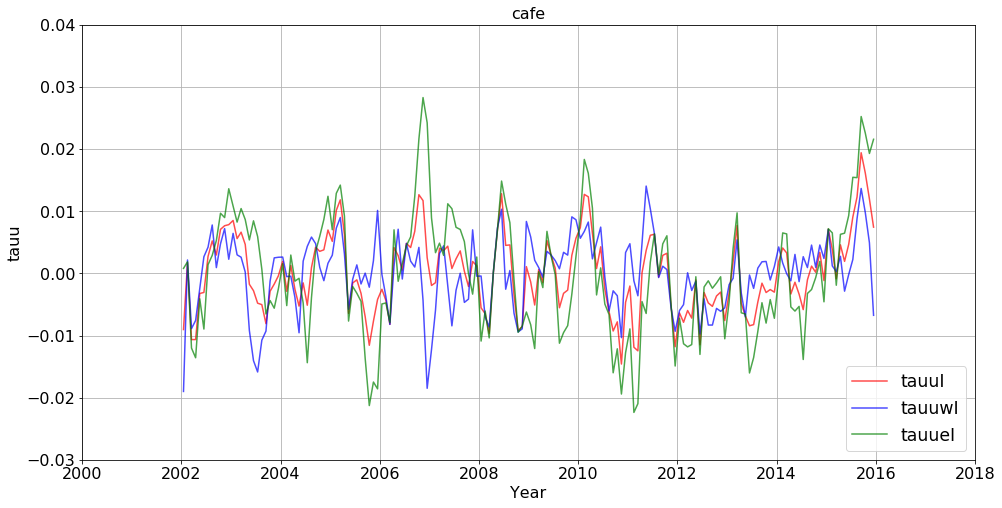

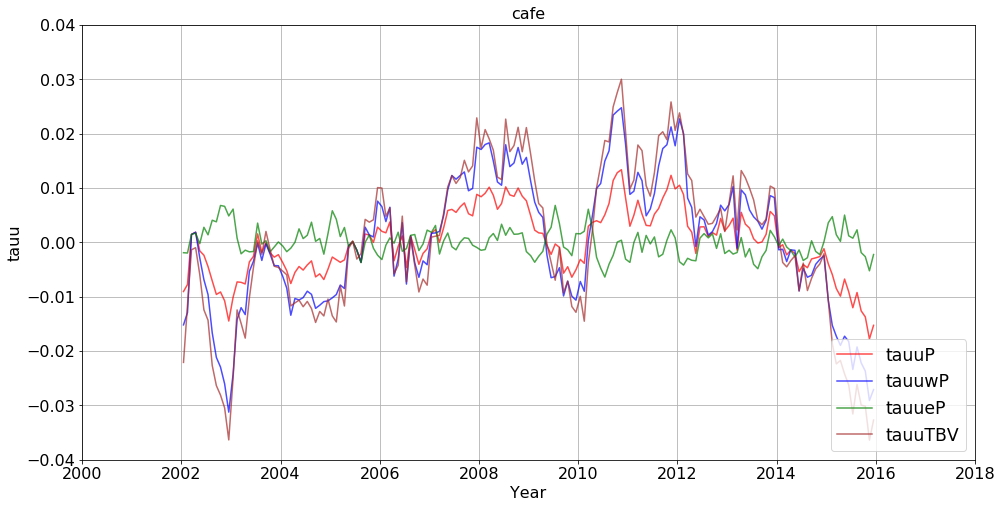

END


In [3]:
print('BEGIN')

'''
Calculate 5s-5n Pacific wind stress time series using daily data.
'''

#===============================================================================

cafe_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025'

input_daily_files=sorted(glob.glob(cafe_idir+'/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_200?????-????????.nc') + \
                         glob.glob(cafe_idir+'/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_201[0,1,2,3,4,5]????-????????.nc'))

print('input_daily_files=',input_daily_files)

cafe_daily_files=n_data_funcs(input_files=[input_daily_files], input_var_name='tauu')

cafe_daily_files.calculate_filedatetime_info(Diag=False, calendar='julian')

cafe_daily_files.get_latlon_info(Diag=False)

cafe_tauubox_indices=box_indices(Diag=True, \
  boxes=( \
    'tauuP,Nm^-2,-5,5,120,280', \
    'tauuwP,Nm^-2,-5,5,120,205', \
    'tauueP,Nm^-2,-5,5,205,280', \
    'tauuI,Nm^-2,-5,5,40,100', \
    'tauuwI,Nm^-2,-5,5,40,70', \
    'tauueI,Nm^-2,-5,5,70,100', \
    'tauuTBV,Nm^-2,-5,5,140,190'), \
  instance=cafe_daily_files)

#fuck

cafe_tauu_daily=cafe_daily_files.calculate_quantity(cafe_tauubox_indices, Diag=False, quantity='z20')

print('cafe_tauu_daily.shape=',cafe_tauu_daily.shape)

cafe_daily_files.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_tauu_monthly_from_daily = cafe_daily_files.daily_to_monthly(EndOption=1, input=cafe_tauu_daily)

print('cafe_tauu_monthly_from_daily.shape=',cafe_tauu_monthly_from_daily.shape)

cafe_tauu_monthly_climatology_from_daily, cafe_tauu_monthly_anomaly_from_daily=cafe_daily_files.monthly_clim_anom( \
  Diag=False, input=cafe_tauu_monthly_from_daily, AnnOut=False, ZeroClim=False) #, cbeg=1981, cend=2000)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('cafe_tauu_monthly_climatology_from_daily.shape=',cafe_tauu_monthly_climatology_from_daily.shape)
print('cafe_tauu_monthly_anomaly_from_daily.shape=',cafe_tauu_monthly_anomaly_from_daily.shape)

plot_box_indices(latmin=cafe_tauubox_indices.latmin, \
                 latmax=cafe_tauubox_indices.latmax, \
                 lonmin=cafe_tauubox_indices.lonmin, \
                 lonmax=cafe_tauubox_indices.lonmax, \
                 labs=cafe_tauubox_indices.boxes_labs, \
                  colors=['red','blue','green','red','blue','green','brown'])

#===============================================================================
#create lat/lon version for hovmoller:

cafe_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/tauu/gn/v20171025'

input_tauullbox_files=sorted(glob.glob(cafe_idir+'/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_200?????-????????.nc') + \
                             glob.glob(cafe_idir+'/tauu_day_historical_CAFE-1-0_r1i1p2f1_gn_201[0,1,2,3,4,5]????-????????.nc'))
#cafe_tauullbox_files
print('input_tauullbox_files=',input_tauullbox_files)

cafe_tauullbox_daily_files=n_data_funcs(input_files=[input_tauullbox_files], input_var_name='tauu')

cafe_tauullbox_daily_files.calculate_filedatetime_info(Diag=False, calendar='julian')

cafe_tauullbox_daily_files.get_latlon_info(Diag=False)

cafe_tauullbox_indices=box_indices(Diag=True, \
  boxes=( \
    'tauuP,Nm^-2,-5,5,120,280',), \
  instance=cafe_tauullbox_daily_files)

cafe_tauu_daily=cafe_daily_files.calculate_quantity(cafe_tauullbox_indices, Diag=False, quantity='latlon_region')

print('cafe_tauu_daily.shape=',cafe_tauu_daily.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cafe_tauullbox_daily_files.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

cafe_tauullbox_monthly_from_daily = cafe_tauullbox_daily_files.daily_to_monthly(EndOption=1, input=cafe_tauu_daily)

print('cafe_tauullbox_monthly_from_daily.shape=',cafe_tauullbox_monthly_from_daily.shape)

cafe_tauullbox_monthly_climatology_from_daily, cafe_tauullbox_monthly_anomaly_from_daily=cafe_tauullbox_daily_files.monthly_clim_anom( \
  Diag=False, input=cafe_tauullbox_monthly_from_daily, AnnOut=False, ZeroClim=False) #, cbeg=1981, cend=2000)

print('cafe_tauullbox_monthly_climatology_from_daily.shape=',cafe_tauullbox_monthly_climatology_from_daily.shape)
print('cafe_tauullbox_monthly_anomaly_from_daily.shape=',cafe_tauullbox_monthly_anomaly_from_daily.shape)

plot_box_indices(latmin=cafe_tauullbox_indices.latmin, \
                 latmax=cafe_tauullbox_indices.latmax, \
                 lonmin=cafe_tauullbox_indices.lonmin, \
                 lonmax=cafe_tauullbox_indices.lonmax, \
                 labs=cafe_tauullbox_indices.boxes_labs, \
                  colors=['red','blue','green','red','blue','green','brown'])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

input_datas = (cafe_tauu_monthly_anomaly_from_daily[:,0],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,1],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,2],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,6],)

input_xvals = (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='cafe', \
  units='Nm^-2', \
  xlab='Year', \
  ylab='tauu', \
  zero2=False, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red','blue','green','brown'], \
  line_labels=[*cafe_tauubox_indices.boxes_labs[0:3],cafe_tauubox_indices.boxes_labs[6]], grid=True \
  )

#===============================================================================

input_datas = (cafe_tauu_monthly_anomaly_from_daily[:,3],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,4],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,5],)

input_xvals = (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='cafe', \
  units='Nm^-2', \
  xlab='Year', \
  ylab='tauu', \
  zero2=False, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red','blue','green'], \
  line_labels=cafe_tauubox_indices.boxes_labs[3:6], grid=True \
  )

#===============================================================================

input_datas = (cafe_tauu_monthly_anomaly_from_daily[:,0],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,1],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,2],)
input_datas = input_datas + (cafe_tauu_monthly_anomaly_from_daily[:,6],)

input_xvals = (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_daily_files.year_fraction_anomaly,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='cafe', \
  units='Nm^-2', \
  xlab='Year', \
  ylab='tauu', \
  zero2=False, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red','blue','green','brown'], \
  line_labels=[*cafe_tauubox_indices.boxes_labs[0:3],cafe_tauubox_indices.boxes_labs[6]], grid=True \
  )

#===============================================================================
#cafe_tauullbox_files
print('END')

BEGIN
ifils_cafe= /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r1i1p2f1_gn_200201-201512.nc
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 6
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280', 'WTIO,$^{o}C$,-10,10,50,70', 'SETIO,$^{o}C$,-10,0,90,110')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0, -10.0, -10.0] [5.0, 5.0, 5.0, 0.0, 10.0, 0.0]  self.jmin,self.jmax= [121, 121, 121, 106, 106, 106] [152, 152, 152, 137, 167, 137]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0, 50.0, 90.0] [240.0, 270.0, 210.0, 280.0, 70.0, 110.0]  self.imin,self.imax= [109, 129, 79, 189, 329, 9] [159, 189, 129, 199, 349, 29]  actual: latmin,latmax= [-5.167124271392822 -5.167124271392822 -5.167124271392822
 -10.16620922088623 -10.16620922088623

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


color= red
lons= [190.0, 240.0, 240.0, 190.0, 190.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= blue
lons= [210.0, 270.0, 270.0, 210.0, 210.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= green
lons= [160.0, 210.0, 210.0, 160.0, 160.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= red
lons= [270.0, 280.0, 280.0, 270.0, 270.0]
lats= [-10.0, -10.0, 0.0, 0.0, -10.0]
color= blue
lons= [50.0, 70.0, 70.0, 50.0, 50.0]
lats= [-10.0, -10.0, 10.0, 10.0, -10.0]
color= green
lons= [90.0, 110.0, 110.0, 90.0, 90.0]
lats= [-10.0, -10.0, 0.0, 0.0, -10.0]


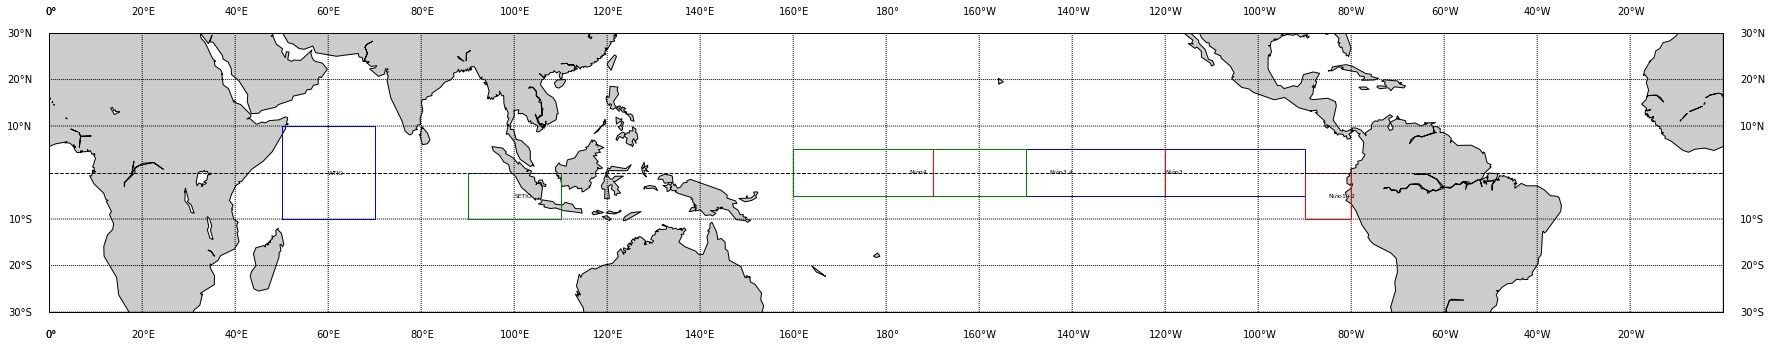

calculate_quantity: value_split= ['z20']
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_ninoboxes_monthly_climatology_from_monthly.shape= (12, 6)
cafe_ninoboxes_monthly_anomaly_from_monthly.shape= (168, 6)


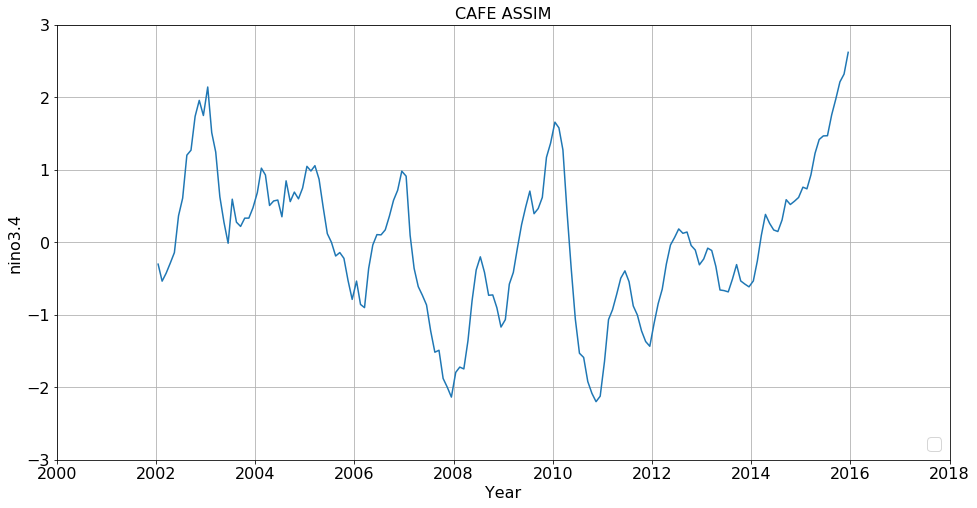

END


In [4]:
print('BEGIN')

'''
Calculate nino34 using boxes class.
'''

idir_cafe='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/tos/gn/v20171025'
ifils_cafe=idir_cafe+'/'+'tos_Omon_historical_CAFE-1-0_r1i1p2f1_gn_200201-201512.nc'

print('ifils_cafe=',ifils_cafe)

cafe_monthly_files=n_data_funcs(input_files=[[ifils_cafe]], input_var_name='tos')

cafe_monthly_files.calculate_filedatetime_info(Diag=False, calendar='julian')

cafe_monthly_files.get_latlon_info(Diag=False, lat='latitude', lon='longitude')

cafe_ninobox_indices=box_indices(Diag=True, \
  boxes=( \
  'Ni$\~{n}$o3.4,$^{o}C$,-5,5,190,240',
  'Ni$\~{n}$o3,$^{o}C$,-5,5,210,270', \
  'Ni$\~{n}$o4,$^{o}C$,-5,5,160,210', \
  'Ni$\~{n}$o1+2,$^{o}C$,-10,0,270,280', \
  'WTIO,$^{o}C$,-10,10,50,70', \
  'SETIO,$^{o}C$,-10,0,90,110'), \
  instance=cafe_monthly_files)

plot_box_indices(latmin=cafe_ninobox_indices.latmin, \
                 latmax=cafe_ninobox_indices.latmax, \
                 lonmin=cafe_ninobox_indices.lonmin, \
                 lonmax=cafe_ninobox_indices.lonmax, \
                 labs=cafe_ninobox_indices.boxes_labs, \
                  colors=['red','blue','green','red','blue','green','pink','orange'])

cafe_ninoboxes_from_monthly=cafe_monthly_files.calculate_quantity(cafe_ninobox_indices, Diag=False, quantity='z20')

cafe_ninoboxes_monthly_climatology_from_monthly, cafe_ninoboxes_monthly_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_ninoboxes_from_monthly, AnnOut=False, ZeroClim=False)

print('cafe_ninoboxes_monthly_climatology_from_monthly.shape=',cafe_ninoboxes_monthly_climatology_from_monthly.shape)
print('cafe_ninoboxes_monthly_anomaly_from_monthly.shape=',cafe_ninoboxes_monthly_anomaly_from_monthly.shape)

input_datas = (cafe_ninoboxes_monthly_anomaly_from_monthly[:,0],)

input_xvals = (cafe_monthly_files.year_fraction_anomaly,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='CAFE ASSIM', \
  units='degC', \
  xlab='Year', \
  ylab='nino3.4', \
  zero2=False, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red'], \
  line_labels=['ninoboxes'], \
  grid=True)

print('END')

BEGIN
cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/t20d/gn/v20171025/t20d_Omon_historical_CAFE-1-0_r1i1p2f1_gn_200201-201606.nc']]
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 1
boxes= ('t20dP,m,-5,5,120,280',)
 latmin,latmax= [-5.0] [5.0]  self.jmin,self.jmax= [121] [152]  lonmin,lonmax= [120.0] [280.0]  self.imin,self.imax= [39] [199]  actual: latmin,latmax= [-5.167124271392822] [5.167124271392822]  actual: lonmin,lonmax= [119.5] [279.5]
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.
cafe_t20dllbox_from_monthly.shape= (174, 32, 161)
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 6 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


color= red
lons= [120.0, 280.0, 280.0, 120.0, 120.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= blue
lons= [120.0, 205.0, 205.0, 120.0, 120.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= green
lons= [205.0, 280.0, 280.0, 205.0, 205.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]


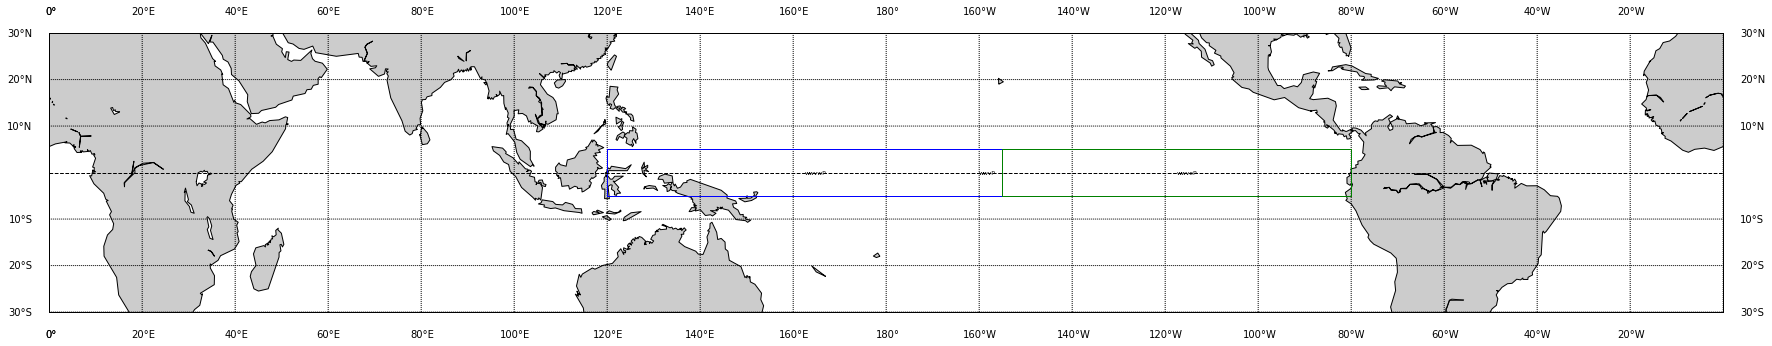

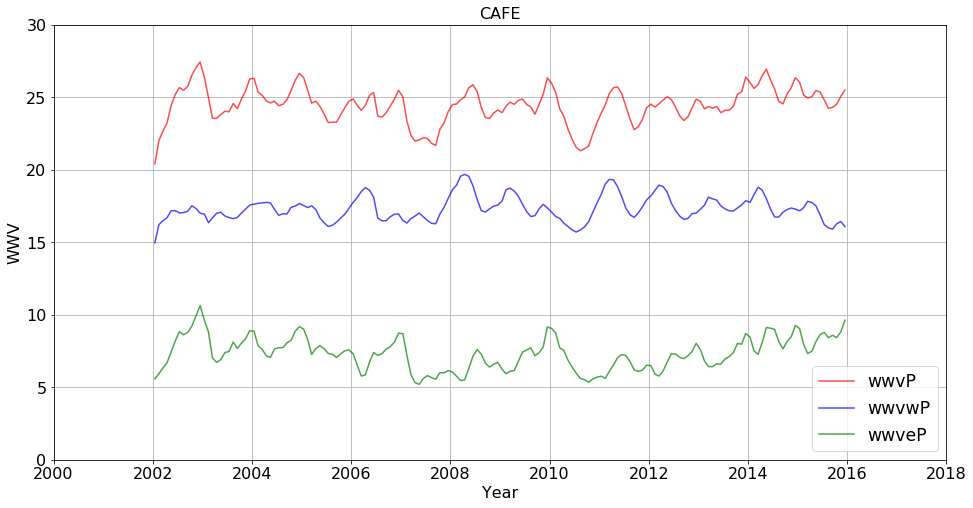

cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/t20d/gn/v20171025/t20d_Omon_historical_CAFE-1-0_r1i1p2f1_gn_200201-201606.nc']]
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 6
boxes= ('z20P,m,-2,2,120,280', 'z20wP,m,-2,2,120,205', 'z20eP,m,-2,2,205,280', 'z20I,m,-2,2,40,100', 'z20wI,m,-2,2,40,70', 'z20eI,m,-2,2,70,100')
 latmin,latmax= [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0] [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]  self.jmin,self.jmax= [130, 130, 130, 130, 130, 130] [143, 143, 143, 143, 143, 143]  lonmin,lonmax= [120.0, 120.0, 205.0, 40.0, 40.0, 70.0] [280.0, 205.0, 280.0, 100.0, 70.0, 100.0]  self.imin,self.imax= [39, 39, 124, 319, 319, 349] [199, 124, 199, 19, 349, 19]  actual: latmin,latmax= [-2.1662092208862305 -2.1662092208862305 -2.1662092208862305
 -2.1662092208862305 -2.1662092208862305 -2.1662092208862305] [2.1662092208862305 2.1662092208862305 2.1

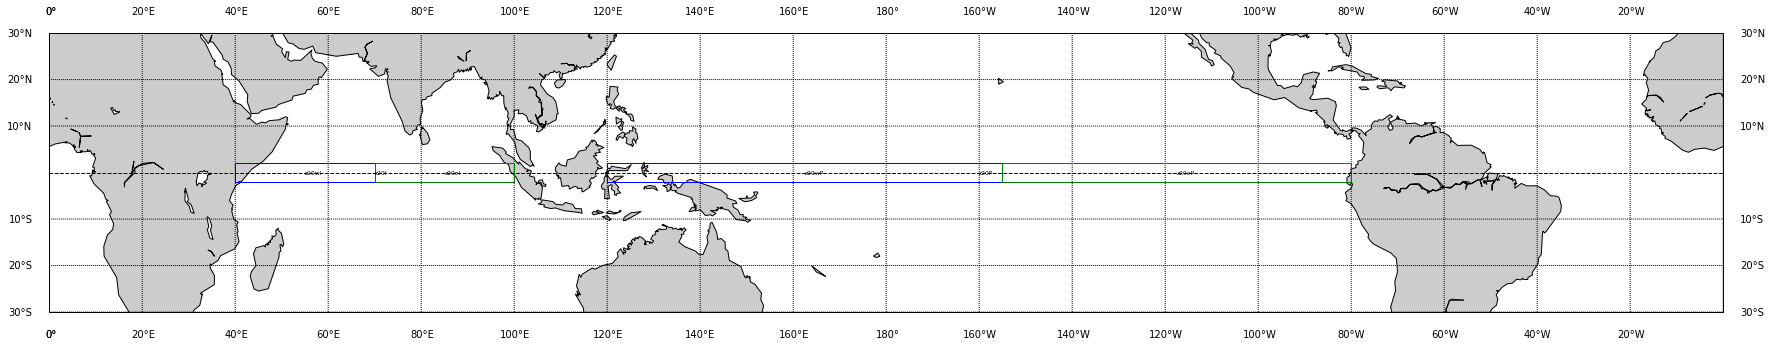

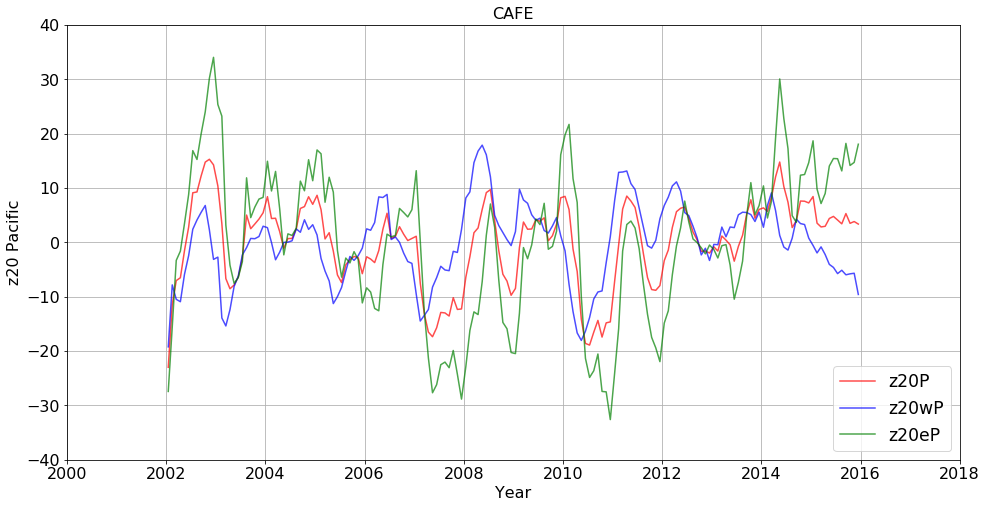

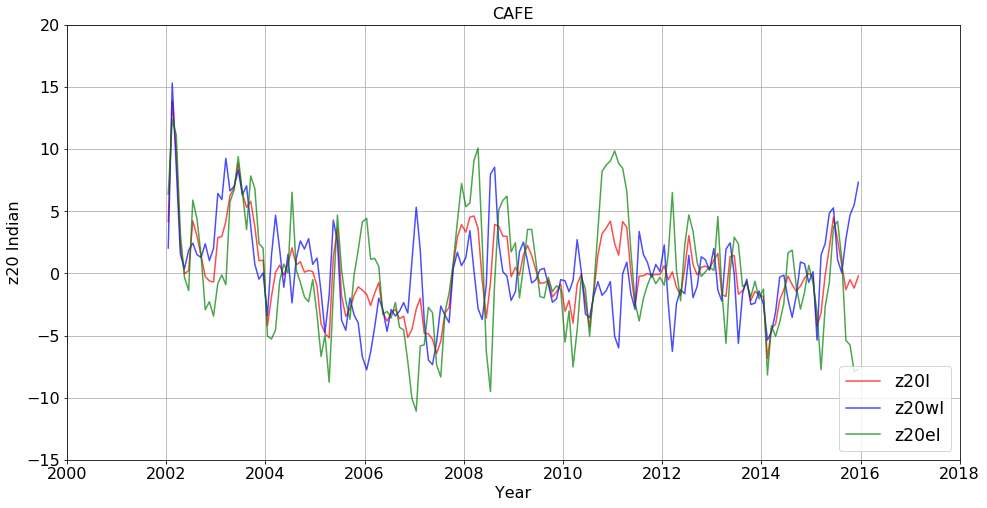

cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/t16d/gn/v20171025/t16d_Omon_historical_CAFE-1-0_r1i1p2f1_gn_200201-201606.nc']]
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
calculate_quantity: value_split= ['latlon_region', '0', '299', '0', '359']
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 6 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 15 0 174
cafe_t16d_annual_climatology_from_monthly.shape= (12, 300, 360)
cafe_t16d_annual_anomaly_from_monthly.shape= (168, 300, 360)
cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/Omon/t20d/gn/v2

In [6]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):

#===============================================================================

  cbeg=2002
  cend=2015
  abeg=2002
  aend=2015

#===============================================================================
#extract box for hovmoller...

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_t20dllbox_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_t20dllbox_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_t20dllbox_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
    
  cafe_llbox_indices=box_indices(Diag=True, \
    boxes=('t20dP,m,-5,5,120,280',), \
    instance=cafe_t20dllbox_files)
      
  cafe_t20dllbox_from_monthly=cafe_t20dllbox_files.calculate_quantity(cafe_llbox_indices, Diag=False, quantity='latlon_region')
  
  print('cafe_t20dllbox_from_monthly.shape=',cafe_t20dllbox_from_monthly.shape)
  
  cafe_t20dllbox_monthly_climatology_from_monthly, cafe_t20dllbox_monthly_anomaly_from_monthly=cafe_t20dllbox_files.monthly_clim_anom( \
    Diag=False, input=cafe_t20dllbox_from_monthly, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_t20dllbox_monthly_climatology_from_monthly.shape=',cafe_t20dllbox_monthly_climatology_from_monthly.shape)
  print('cafe_t20dllbox_monthly_anomaly_from_monthly.shape=',cafe_t20dllbox_monthly_anomaly_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

#   ifh=netCDF4.Dataset('/OSM/CBR/OA_DCFP/data/CAFEPP/g/data/p66/mac599/CMIP5/ancillary_files/grid_spec.auscom.20110618.nc')
#   area_T = ifh.variables['area_T'][:]
#   wet = ifh.variables['wet'][:]
#   print('area_T.shape=',area_T.shape)
#   print('wet.shape=',wet.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#create new quantity wwv

#CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p13f1/Omon/t22d/gn/v20171025/t22d_Omon_piControl_CAFE-1-0_r1i1p13f1_gn_047001-050012.nc

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
    
  cafe_wwvbox_indices=box_indices(Diag=True, \
    boxes=('wwvP,m^3,-5,5,120,280','wwvwP,m^3,-5,5,120,205','wwveP,m^3,-5,5,205,280'), \
    instance=cafe_monthly_files)
  
  cafe_wwv_from_monthly=cafe_monthly_files.calculate_quantity(cafe_wwvbox_indices, Diag=False, quantity='wwv')
  
  print('cafe_wwv_from_monthly.shape=',cafe_wwv_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_wwv_monthly_climatology_from_monthly, cafe_wwv_monthly_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_wwv_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_wwv_monthly_climatology_from_monthly.shape=',cafe_wwv_monthly_climatology_from_monthly.shape)
  print('cafe_wwv_monthly_anomaly_from_monthly.shape=',cafe_wwv_monthly_anomaly_from_monthly.shape)
  
  plot_box_indices(latmin=cafe_wwvbox_indices.latmin,latmax=cafe_wwvbox_indices.latmax,lonmin=cafe_wwvbox_indices.lonmin,lonmax=cafe_wwvbox_indices.lonmax,labs=cafe_wwvbox_indices.boxes_labs, \
    colors=['red','blue','green'])
  
###

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (cafe_wwv_monthly_anomaly_from_monthly[:,0]/1e14,)
  input_datas = input_datas + (cafe_wwv_monthly_anomaly_from_monthly[:,1]/1e14,)
  input_datas = input_datas + (cafe_wwv_monthly_anomaly_from_monthly[:,2]/1e14,)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE', \
    units='m3 * 1e14', \
    xlab='Year', \
    ylab='WWV', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_wwvbox_indices.boxes_labs[0:3], grid=True \
    )
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#create new quantity z20

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  #cafe_box_indices=box_indices(Diag=True, boxes=('laba,131,143,40,140','labb,131,143,40,140'))
  
  cafe_z20box_indices=box_indices(Diag=True, \
    boxes=('z20P,m,-2,2,120,280','z20wP,m,-2,2,120,205','z20eP,m,-2,2,205,280','z20I,m,-2,2,40,100','z20wI,m,-2,2,40,70','z20eI,m,-2,2,70,100'), \
    instance=cafe_monthly_files)
  
  #print('aaa')
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  cafe_z20_from_monthly=cafe_monthly_files.calculate_quantity(cafe_z20box_indices, Diag=False, quantity='z20')
  
  print('cafe_z20_from_monthly.shape=',cafe_z20_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cafe_z20_monthly_climatology_from_monthly, cafe_z20_monthly_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_z20_from_monthly, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_z20_monthly_climatology_from_monthly.shape=',cafe_z20_monthly_climatology_from_monthly.shape)
  print('cafe_z20_monthly_anomaly_from_monthly.shape=',cafe_z20_monthly_anomaly_from_monthly.shape)
  
  plot_box_indices(latmin=cafe_z20box_indices.latmin,latmax=cafe_z20box_indices.latmax,lonmin=cafe_z20box_indices.lonmin,lonmax=cafe_z20box_indices.lonmax,labs=cafe_z20box_indices.boxes_labs, \
    colors=['red','blue','green','red','blue','green'])
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (cafe_z20_monthly_anomaly_from_monthly[:,0],)
  input_datas = input_datas + (cafe_z20_monthly_anomaly_from_monthly[:,1],)
  input_datas = input_datas + (cafe_z20_monthly_anomaly_from_monthly[:,2],)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE', \
    units='m', \
    xlab='Year', \
    ylab='z20 Pacific', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_z20box_indices.boxes_labs[0:3], grid=True \
    )

  input_datas = (cafe_z20_monthly_anomaly_from_monthly[:,3],)
  input_datas = input_datas + (cafe_z20_monthly_anomaly_from_monthly[:,4],)
  input_datas = input_datas + (cafe_z20_monthly_anomaly_from_monthly[:,5],)

  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE', \
    units='m', \
    xlab='Year', \
    ylab='z20 Indian', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red','blue','green'], \
    line_labels=cafe_z20box_indices.boxes_labs[3:6], grid=True \
    )
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  ivar_str_cafe='t16d';offset=0.0;scale=1.0;long_name='t16d';short_name='t16d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t16d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t16d_annual_climatology_from_monthly, cafe_t16d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t16d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_t16d_annual_climatology_from_monthly.shape=',cafe_t16d_annual_climatology_from_monthly.shape)
  print('cafe_t16d_annual_anomaly_from_monthly.shape=',cafe_t16d_annual_anomaly_from_monthly.shape)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t20d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t20d_annual_climatology_from_monthly, cafe_t20d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t20d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t20d_annual_climatology_from_monthly.shape=',cafe_t20d_annual_climatology_from_monthly.shape)
  print('cafe_t20d_annual_anomaly_from_monthly.shape=',cafe_t20d_annual_anomaly_from_monthly.shape)
  
#   area_T_match = np.expand_dims(np.expand_dims(area_T*wet,0),0)
#   print('area_T_match.shape=',area_T_match.shape)
  
#   area_T_new = np.tile(area_T_match,(60,2,1,1))
#   print('area_T_new.shape=',area_T_new.shape)
  
#   wwv3d = np.sum(np.sum(np.average(cafe_t20d_annual_anomaly_from_monthly[:,:,122:152+1,40:200+1] * area_T_new[:,:,122:152+1,40:200+1],axis=1),axis=1),axis=1)
  
#   input_datas = (wwv3d/1e14,)
#   input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  
#   plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
#     ylim=[0,30], \
#     title='CAFE', \
#     units='m3 * 1e14', \
#     xlab='Year', \
#     ylab='WWV', \
#     zero2=False, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(16,8), \
#     line_colors=['red'], \
#     line_labels=['cafe v1'] \
#     )
  
#===============================================================================

  ivar_str_cafe='t22d';offset=0.0;scale=1.0;long_name='t22d';short_name='t22d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,1+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200201-201606.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t22d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t22d_annual_climatology_from_monthly, cafe_t22d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t22d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t22d_annual_climatology_from_monthly.shape=',cafe_t22d_annual_climatology_from_monthly.shape)
  print('cafe_t22d_annual_anomaly_from_monthly.shape=',cafe_t22d_annual_anomaly_from_monthly.shape)
  
#===============================================================================

print('END')

BEGIN


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


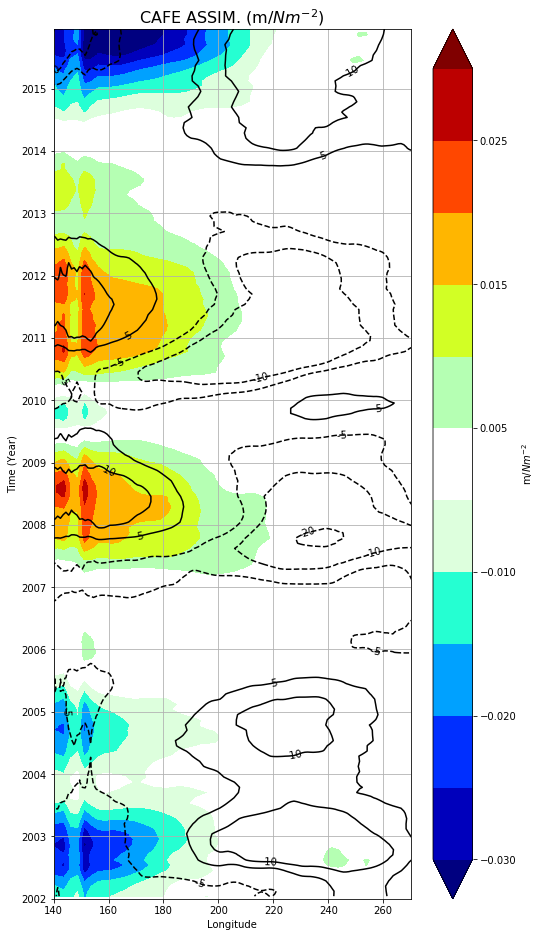

END


In [7]:
print('BEGIN')

'''
Here we can calculate t20d and wind-stress anomalies for plotting as overlaid hovmoller.

'''
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#import smooth

clevs=None
step=5;clevs=sorted(list(set(np.arange(-15, 15+step, step).tolist())))

clevs=[-15,-10,-5,5,10,15]

#https://stackoverflow.com/questions/45196233/python-matplotlib-create-normal-colorbar-with-white-interval-at-specific-values

n=30
x = 0.5
cmap = plt.cm.jet
lower = cmap(np.linspace(0, x, n))
white = np.ones((80-2*n,4))
upper = cmap(np.linspace(1-x, 1, n))
colors = np.vstack((lower, white, upper))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('map_white', colors)

# jet, Spectral, terrain, RdYlGn
# shade_2d_simple(np.average(cafe_t20dllbox_monthly_anomaly_from_monthly,axis=1), \
#   title='hovmoller', \
#   xyvals=(cafe_t20dllbox_files.lon[cafe_t20dllbox_files.imin:cafe_t20dllbox_files.imax+1], cafe_t20dllbox_files.year_fraction_anomaly), \
#   add_contours=False, \
#   units='m', \
#   clevs=clevs, \
#   extend='both', \
#   cmap=tmap, \
#   reverse_yaxis=False, \
#   ylab='Time (Year)', \
#   xlab='Longitude', \
#   grid=True, \
#   xysize=(16,16), \
#   )

ismth=13 #must be odd number

clevs=None
step=.02;clevs=sorted(list(set(np.arange(-.08, .06+step, step).tolist())))
clevs=[-.06,-.05,-.04,-.03,-.02,-.01,.01,.02,.03,.04,.05,.06]
clevs=[-.03,-.025,-.02,-.015,-.01,-.005,.005,.01,.015,.02,.025,.03]

t20d_array=np.average(cafe_t20dllbox_monthly_anomaly_from_monthly,axis=1)
t20d_array_smth=ma.zeros(t20d_array.shape,dtype=float)
for lon in range(0,t20d_array.shape[1]):
  t20d_array_smth[:,lon]=smooth(t20d_array[:,lon],window_len=ismth,window='flat')

tauu_array=np.average(cafe_tauullbox_monthly_anomaly_from_daily,axis=1)
tauu_array_smth=ma.zeros(tauu_array.shape,dtype=float)
for lon in range(0,tauu_array.shape[1]):
  tauu_array_smth[:,lon]=smooth(tauu_array[:,lon],window_len=ismth,window='flat')

shade_2d_simple(tauu_array_smth, \
  title='CAFE ASSIM.', \
  xyvals=(cafe_tauullbox_daily_files.lon[cafe_tauullbox_indices.imin[0]:cafe_tauullbox_indices.imax[0]+1], cafe_tauullbox_daily_files.year_fraction_anomaly), \
  add_contours=False, \
  units='m/$Nm^{-2}$', \
  clevs=clevs, \
  extend='both', \
  cmap=tmap, \
  reverse_yaxis=False, \
  ylab='Time (Year)', \
  xlab='Longitude', \
  grid=True, \
  xlim=[140,270], \
  ytik=range(2002,2015+1,1), \
#  ylim=[1990,2005], \
  xysize=(8,16), \
  n_contour=[-60,-40,-20,-10,-5,5,10,20,40,60], \
  contour_arrays=((cafe_t20dllbox_files.lon[cafe_t20dllbox_files.imin:cafe_t20dllbox_files.imax+1], cafe_t20dllbox_files.year_fraction_anomaly, t20d_array_smth),), \
  )

print('END')

BEGIN
len(boxes)= 1
boxes= ('z20P,m,-.25,.25,120,280',)
 latmin,latmax= [-0.25] [0.25]  self.jmin,self.jmax= [136] [137]  lonmin,lonmax= [120.0] [280.0]  self.imin,self.imax= [39] [199]  actual: latmin,latmax= [-0.16620922088623047] [0.16620922088623047]  actual: lonmin,lonmax= [119.5] [279.5]


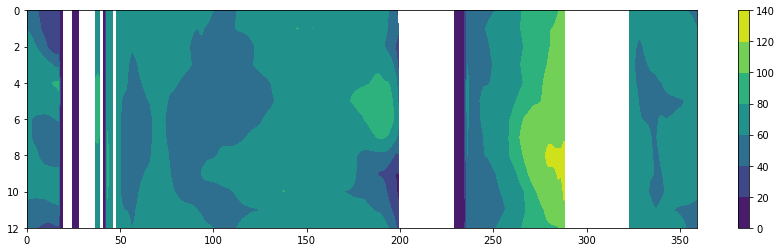

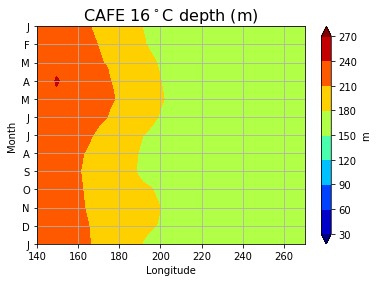

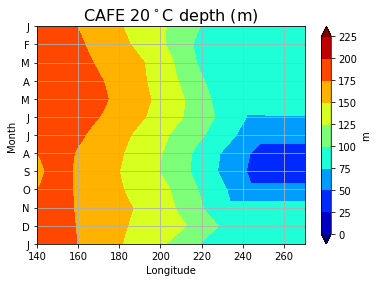

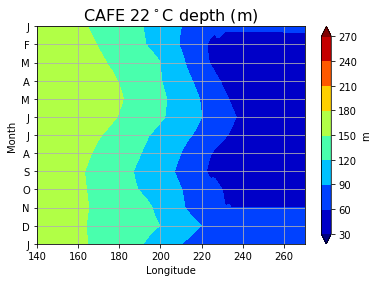

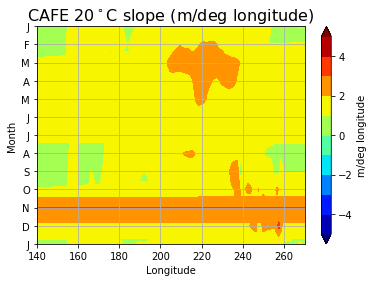

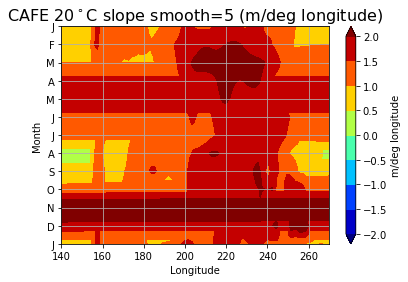

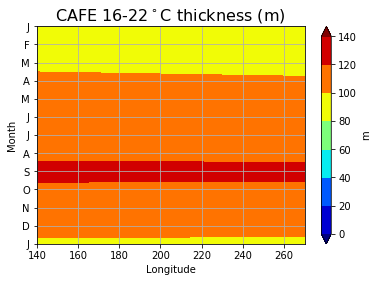

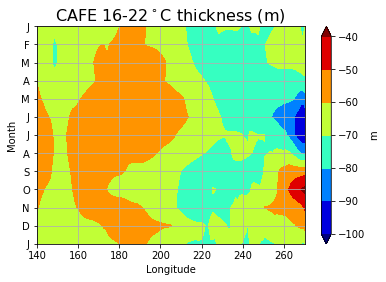

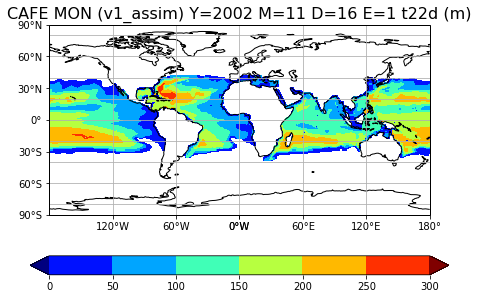

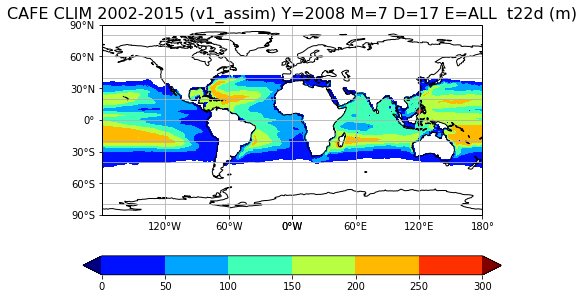

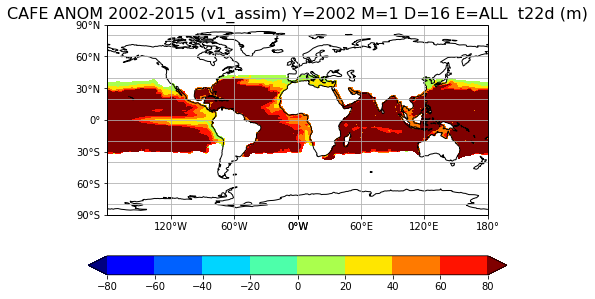

END


In [8]:
print('BEGIN')

month_to_plot=10 #base 0
year_to_plot=0 #base 0
ensemble_to_plot=1 #base 0

clevs=None

reverse_yaxis=True
#reverse_yaxis=False

#print(cafe_monthly_files.lat[:])

#capture equator:
cafe_box_indices=box_indices(Diag=True, \
    boxes=('z20P,m,-.25,.25,120,280',), \
    instance=cafe_monthly_files)

jmin,jmax=cafe_box_indices.jmin[0],cafe_box_indices.jmax[0]
# print('jmin,jmax=',jmin,jmax)
# print('type(jmin),type(jmax)=',type(jmin),type(jmax))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

hov_iso16_array=np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso16_array_shape=hov_iso16_array.shape
hov_iso16_array_shape_xtramon=[hov_iso16_array_shape[0]+1,hov_iso16_array_shape[1]]
hov_iso16_array_xtramon=ma.zeros(hov_iso16_array_shape_xtramon,dtype=float)
hov_iso16_array_xtramon[0:hov_iso16_array_shape[0],:]=hov_iso16_array
hov_iso16_array_xtramon[hov_iso16_array_shape[0],:]=hov_iso16_array[0,:]

#===============================================================================

hov_iso20_array=np.average(cafe_t20d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso20_array_shape=hov_iso20_array.shape
hov_iso20_array_shape_xtramon=[hov_iso20_array_shape[0]+1,hov_iso20_array_shape[1]]
hov_iso20_array_xtramon=ma.zeros(hov_iso20_array_shape_xtramon,dtype=float)
hov_iso20_array_xtramon[0:hov_iso20_array_shape[0],:]=hov_iso20_array
hov_iso20_array_xtramon[hov_iso20_array_shape[0],:]=hov_iso20_array[0,:]

#===============================================================================
hov_iso22_array=np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)
hov_iso22_array_shape=hov_iso22_array.shape
hov_iso22_array_shape_xtramon=[hov_iso22_array_shape[0]+1,hov_iso22_array_shape[1]]
hov_iso22_array_xtramon=ma.zeros(hov_iso22_array_shape_xtramon,dtype=float)
hov_iso22_array_xtramon[0:hov_iso22_array_shape[0],:]=hov_iso22_array
hov_iso22_array_xtramon[hov_iso22_array_shape[0],:]=hov_iso22_array[0,:]

#===============================================================================

hov_thickness_array=np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1) - \
  np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)

#try:
#hov_thickness_array=hov_iso16_array-hov_iso22_array

hov_thickness_array_shape=hov_thickness_array.shape
hov_thickness_array_shape_xtramon=[hov_thickness_array_shape[0]+1,hov_thickness_array_shape[1]]
hov_thickness_array_xtramon=ma.zeros(hov_thickness_array_shape_xtramon,dtype=float)
hov_thickness_array_xtramon[0:hov_thickness_array_shape[0],:]=hov_thickness_array
hov_thickness_array_xtramon[hov_thickness_array_shape[0],:]=hov_thickness_array[0,:]

# print(type(hov_thickness_array))
# print(type(cafe_t22d_annual_climatology_from_monthly))
# print(type(hov_thickness_array_xtramon))

hov_thickness_array2=np.average(cafe_t22d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1) - \
  np.average(cafe_t16d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1)

hov_thickness_array2_shape=hov_thickness_array2.shape
hov_thickness_array2_shape_xtramon=[hov_thickness_array2_shape[0]+1,hov_thickness_array2_shape[1]]
hov_thickness_array2_xtramon=ma.zeros(hov_thickness_array2_shape_xtramon,dtype=float)
hov_thickness_array2_xtramon[0:hov_thickness_array2_shape[0],:]=hov_thickness_array2
hov_thickness_array2_xtramon[hov_thickness_array2_shape[0],:]=hov_thickness_array2[0,:]

import pylab as pl
from matplotlib import cm
import matplotlib.pyplot as plt


#X, Y = np.mgrid[0:1:360j, 0:1:13j]
X, Y = np.mgrid[0:360, 0:13]

fig,axs = plt.subplots(1, 1, figsize=(15, 4))
#fig.set_size_inches(15,4)

cs = axs.contourf(X, Y, hov_thickness_array_xtramon.transpose())
axs.invert_yaxis()

#plt.gca().invert_yaxis()
# cs = axs[1].contourf(X, Y, hov_thickness_array2_xtramon.transpose())
#plt.gca().invert_yaxis()

#ax = plt.gca()
#axs.invert_yaxis()
# axs[1].invert_yaxis()

cb = plt.colorbar(cs)
plt.show()

#===============================================================================

hov_slope_array= \
  np.gradient(np.average(cafe_t20d_annual_climatology_from_monthly[:,jmin:jmax+1,:],axis=1),axis=1)*-1  #need to scale by -1 so that a positive value indicates thermocline sloping upwards towards the E. Pacfic.
hov_slope_array_shape=hov_slope_array.shape
hov_slope_array_shape_xtramon=[hov_slope_array_shape[0]+1,hov_slope_array_shape[1]]
hov_slope_array_xtramon=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
hov_slope_array_xtramon[0:hov_slope_array_shape[0],:]=hov_slope_array
hov_slope_array_xtramon[hov_slope_array_shape[0],:]=hov_slope_array[0,:]

ismth=5
hov_slope_array_xtramon_smth=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
for month in range(0,hov_slope_array_xtramon.shape[0]):
  hov_slope_array_xtramon_smth[month,:]=smooth(hov_slope_array_xtramon[month,:],window_len=ismth,window='flat')

#===============================================================================

#print(hov_array_xtramon.shape)

step=30;clevs=sorted(list(set(np.arange(30, 270+step, step).tolist())))
shade_2d_simple(hov_iso16_array_xtramon, \
  title=model+' 16$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=25;clevs=sorted(list(set(np.arange(0, 225+step, step).tolist())))
shade_2d_simple(hov_iso20_array_xtramon, \
  title=model+' 20$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=25;clevs=sorted(list(set(np.arange(0, 200+step, step).tolist())))
step=30;clevs=sorted(list(set(np.arange(30, 270+step, step).tolist())))
shade_2d_simple(hov_iso22_array_xtramon, \
  title=model+' 22$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=1;clevs=sorted(list(set(np.arange(-5, 5+step, step).tolist())))
shade_2d_simple(hov_slope_array_xtramon, \
  title=model+' 20$^\circ$C slope', \
#   n_contour=[0], \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=.5;clevs=sorted(list(set(np.arange(-2, 2+step, step).tolist())))
shade_2d_simple(hov_slope_array_xtramon_smth, \
  title=model+' 20$^\circ$C slope smooth='+str(ismth), \
#   n_contour=[0], \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
clevs=None
#step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
shade_2d_simple(hov_thickness_array_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=10;clevs=sorted(list(set(np.arange(-100, -40+step, step).tolist())))
#clevs=None
#step=20;clevs=sorted(list(set(np.arange(0, 160+step, step).tolist())))
shade_2d_simple(hov_thickness_array2_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(cafe_monthly_files.lon[:],range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

#===============================================================================

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=[0,50,100,150,200,250,300]

shade_2d_curvilinear(cafe_t20d_from_monthly[month_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' MON ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_tfreq[month_to_plot].day)+ \
  ' E='+str(ensemble_to_plot)+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

shade_2d_curvilinear(cafe_t20d_annual_climatology_from_monthly[year_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

clevs=[-80,-60,-40,-20,0,20,40,60,80]
shade_2d_curvilinear(cafe_t20d_annual_anomaly_from_monthly[year_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

print('END')

BEGIN
cafe_ninobox_indices.boxes_labs= ['Ni$\\~{n}$o3.4', 'Ni$\\~{n}$o3', 'Ni$\\~{n}$o4', 'Ni$\\~{n}$o1+2', 'WTIO', 'SETIO']
cafe_wwvbox_indices.boxes_labs= ['wwvP', 'wwvwP', 'wwveP']
cafe_z20box_indices.boxes_labs= ['z20P', 'z20wP', 'z20eP', 'z20I', 'z20wI', 'z20eI']
cafe_ninobox_indices.boxes_units= ['$^{o}C$', '$^{o}C$', '$^{o}C$', '$^{o}C$', '$^{o}C$', '$^{o}C$']
cafe_wwvbox_indices.boxes_units= ['m^3', 'm^3', 'm^3']
cafe_z20box_indices.boxes_units= ['m', 'm', 'm', 'm', 'm', 'm']
[167]


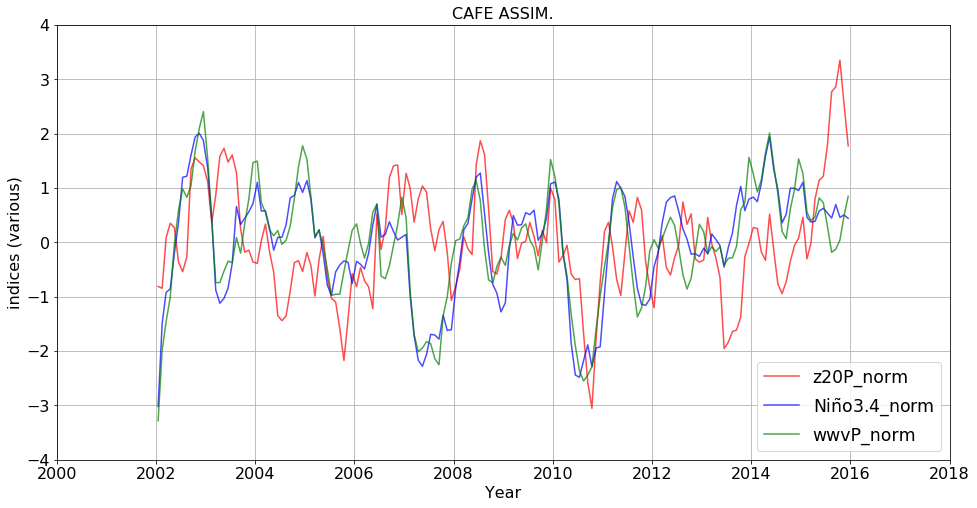

Inputing xsize,ysize.
Inputing xbox_indices,ybox_indices.
Inputing x_index,y_index.


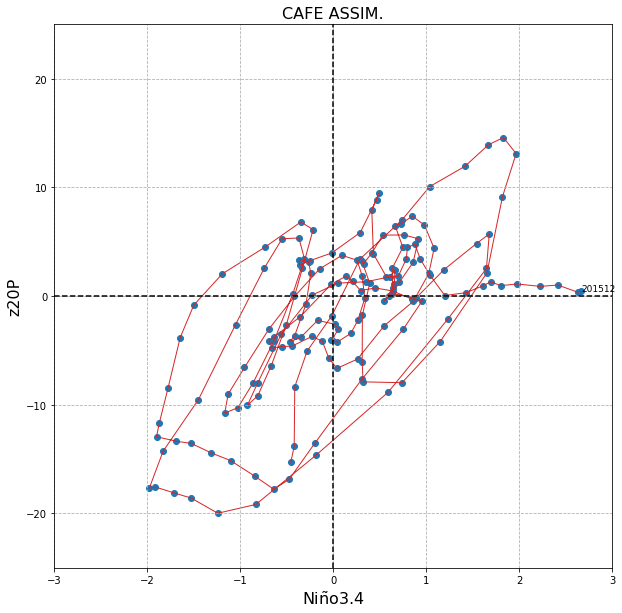

END


In [9]:
print('BEGIN')

'''
Product an overlay plot of wwv, z20, nino34 etc.

'''

print('cafe_ninobox_indices.boxes_labs=',cafe_ninobox_indices.boxes_labs)

print('cafe_wwvbox_indices.boxes_labs=',cafe_wwvbox_indices.boxes_labs)

print('cafe_z20box_indices.boxes_labs=',cafe_z20box_indices.boxes_labs)

print('cafe_ninobox_indices.boxes_units=',cafe_ninobox_indices.boxes_units)

print('cafe_wwvbox_indices.boxes_units=',cafe_wwvbox_indices.boxes_units)

print('cafe_z20box_indices.boxes_units=',cafe_z20box_indices.boxes_units)

#print(cafe_monthly_files.date_time_stamp_anomaly)

cafe_years_months_from_monthly=[]
for cnt in range(cafe_monthly_files.date_time_stamp_anomaly.size):
  cafe_years_months_from_monthly.append(cafe_monthly_files.date_time_stamp_anomaly[cnt].year*100+cafe_monthly_files.date_time_stamp_anomaly[cnt].month)

#ifnd_times=[197212,198212,199112,199712,201512]
ifnd_times=[201512]

ifnds=[]
for ifnd_time in ifnd_times:
  ifnds.append(cafe_years_months_from_monthly.index(ifnd_time))
  
#ifnd=cafe_years_months_from_monthly.index(199712)

#print(cafe_years_months_from_monthly)

print(ifnds)

#print(cafe_monthly_files.date_time_stamp_anomaly[0].year)

from scipy import stats
  
z20_index=0
wwv_index=0
nino_index=0

nino=cafe_ninoboxes_monthly_anomaly_from_monthly[:,nino_index]
nino_norm = (nino - np.average(nino)) / np.std(nino)

z20=cafe_z20_monthly_anomaly_from_monthly[:,z20_index]
z20_norm = (z20 - np.average(z20)) / np.std(z20)

wwv=cafe_wwv_monthly_anomaly_from_monthly[:,wwv_index]
wwv_norm = (wwv - np.average(wwv)) / np.std(wwv)

dmi=cafe_ninoboxes_monthly_anomaly_from_monthly[:,4] - cafe_ninoboxes_monthly_anomaly_from_monthly[:,5] #WTIO - SETIO
dmi_norm = (dmi - np.average(dmi)) / np.std(dmi)

x=cafe_monthly_files.year_fraction_anomaly

y=nino;slope, intercept, r_val, p_val, std_err = stats.linregress(x,y);trend = (slope*x + intercept);nino = trend[0] + y - trend
   
y=z20;slope, intercept, r_val, p_val, std_err = stats.linregress(x,y);trend = (slope*x + intercept);z20 = trend[0] + y - trend

y=wwv;slope, intercept, r_val, p_val, std_err = stats.linregress(x,y);trend = (slope*x + intercept);wwv = trend[0] + y - trend

y=dmi;slope, intercept, r_val, p_val, std_err = stats.linregress(x,y);trend = (slope*x + intercept);dmi = trend[0] + y - trend

nino=smooth(nino,window_len=3,window='flat')
wwv=smooth(wwv,window_len=3,window='flat')
z20=smooth(z20,window_len=3,window='flat')
dmi=smooth(dmi,window_len=3,window='flat')

input_datas = (dmi_norm,)
input_datas = input_datas + (z20_norm,)
input_datas = input_datas + (wwv_norm,)

input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)
input_xvals = input_xvals + (cafe_monthly_files.year_fraction_anomaly,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='CAFE ASSIM.', \
  units='', \
  xlab='Year', \
  ylab='indices (various)', \
  zero2=False, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  xysize=(16,8), \
  line_colors=['red','blue','green'], \
  line_labels=[cafe_z20box_indices.boxes_labs[z20_index]+'_norm', cafe_ninobox_indices.boxes_labs[nino_index]+'_norm', cafe_wwvbox_indices.boxes_labs[wwv_index]+'_norm'], \
  grid=True)

NORM=True
NORM=False

if(NORM):
  xlim=[-4,4]
  ylim=[-4,4]
else:
  xlim=[-3,3]
  ylim=[-25,25] 

plot_2d_scatter( \
  nino, \
  z20, \
  title='CAFE ASSIM.', \
  Diag=True, \
  find=(ifnds, ifnd_times), \
  xlim=xlim, \
  ylim=ylim, \
  xysize=(10,10), \
  xybox_indices=(cafe_ninobox_indices,cafe_z20box_indices), \
  xy_index=(0,0) \
  )

print('END')

BEGIN


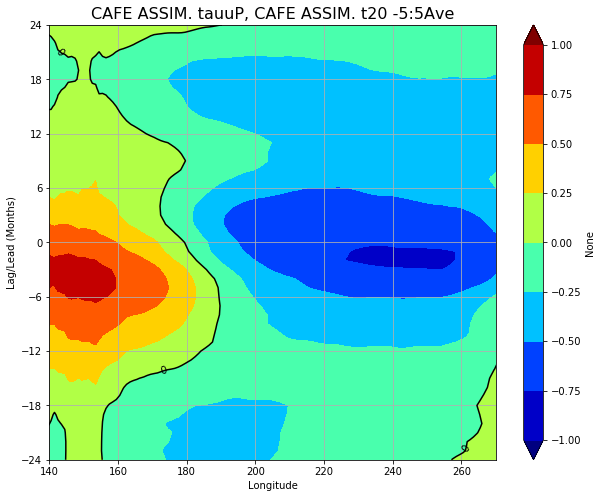

END


In [15]:
print('BEGIN')

cafe_t20dllbox_lons = cafe_t20dllbox_files.lon[cafe_t20dllbox_files.imin:cafe_t20dllbox_files.imax+1]
cafe_t20dllbox_clat = cafe_t20dllbox_files.clat[cafe_t20dllbox_files.jmin:cafe_t20dllbox_files.jmax+1]

cafe_years_months_from_monthly=[]
for cnt in range(cafe_t20dllbox_files.date_time_stamp_anomaly.size):
  cafe_years_months_from_monthly.append(cafe_t20dllbox_files.date_time_stamp_anomaly[cnt].year*100+cafe_t20dllbox_files.date_time_stamp_anomaly[cnt].month)

lag=range(-24,24+1,1)

cafe_index=0

ll_array=ma.zeros((len(lag), len(cafe_t20dllbox_lons)), dtype=float)

for cnt,lon in enumerate(range(len(cafe_t20dllbox_lons))):

  z20_lonstrip=np.average(cafe_t20dllbox_monthly_anomaly_from_monthly[:,:,cnt], weights=cafe_t20dllbox_clat, axis=1) #need to weight lat.
  pac_uflx=cafe_tauu_monthly_anomaly_from_daily[:,cafe_index]
  ll=lagcorr(pac_uflx, z20_lonstrip, \
             lag=lag, \
             verbose=False)
  ll_array[:,cnt]=ll[:,0] #0: correlation, 1: p-value

#negative lead means that winds (x) lead z20 (y). The plot seems to be x-axis flipped cf. Cai MWR paper.
  
shade_2d_simple(ll_array, \
  xyvals = (cafe_t20dllbox_lons, lag), \
  title='CAFE ASSIM. '+cafe_tauubox_indices.boxes_labs[cafe_index]+', CAFE ASSIM. t20 -5:5Ave', \
  ylab='Lag/Lead (Months)', \
  xlab='Longitude', \
  grid=True, \
  extend='both', \
  xlim=[140,270], \
  ylim=[-24,24], \
  ytik=range(-24,24+1,6), \
  xysize=(10,8), \
  n_contour=[0], \
  units=None, \
#   reverse_xaxis=True, \
  )

print('END')